## Import CSV files into Python for Seaborn plots

**AIM**: This workbook describes the best methods to import data into Python from .csv files parsing date columns.

### 1. Load required libraries

In [1]:
# Pandas and os for data ingestion and file manipulation
import pandas as pd
import os

Loading also specific Seaborn libraries

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt 
sns.set_theme(style="darkgrid")

### 2. Build path to project folder 

In this section, I build the path to the \data project folder where I can load any .xlsx or .csv file into Python.

In [3]:
my_wd = os.getcwd()
print("My working directory is:",my_wd)

My working directory is: /home/pablo/Documents/Pablo_zorin/VS_Python_GitHub_Pablo_source/ML-using-Python/Seaborn_gallery


In [5]:
#- I need to change default WD to ML-using-Python folder to access \data sub-folder to ingest Excel file called "INE total and foreign population figures Spain.xlsx"
ML_using_Python_folder = os.path.join('/home','pablo','Documents','Pablo_zorin','VS_Python_GitHub_Pablo_source','ML-using-Python')
print('My Python project folder is:',ML_using_Python_folder)

My Python project folder is: /home/pablo/Documents/Pablo_zorin/VS_Python_GitHub_Pablo_source/ML-using-Python


In [6]:
# change default folder to this /ML-using-Python folder
os.chdir(ML_using_Python_folder)


In [7]:
new_wd = os.getcwd()
print("Changed default working directory to:",new_wd)

Changed default working directory to: /home/pablo/Documents/Pablo_zorin/VS_Python_GitHub_Pablo_source/ML-using-Python


### 3. Check data folder file contents

- Check file contents from \data folder and build path to Excel file to be imported into python 

In [8]:
data_folder = os.path.join('/home','pablo','Documents','Pablo_zorin','VS_Python_GitHub_Pablo_source','ML-using-Python','data')
data_folder_contents = os.listdir(data_folder)
print('data folder contents:',data_folder_contents)

data folder contents: ['wine_quality.zip', 'winequality.names', 'Monthly-AE-Time-Series-January-2024.xls', 'INE Resident population country of birth Spain.xlsx', 'AE_Time_Series_Data_website.txt', 'winequality-red.csv', 'OCDE_countries_population_figures_1970_2022.csv', 'all_wine_reset.csv', '03_INE_Spain_natural_growh_births_deaths.xlsx', '02 INE Spain CV population stocks and flows 2002 2025.xlsx', 'AE_Attendances_TypeI_2010_2025.csv', 'AE_Attendances_Aug2010_Mar_2025.csv', 'Monthly-AE-Time-Series-March-2025.xls', 'AE_Attendances_2010_2024.csv', 'Type_I_ATT_TEST.csv', 'Type_I_ATT_TRAIN.csv', 'ONS_Figure_2__Population_increase_in_mid-2023_was_driven_mostly_by_net_international_migration.xls', 'winequality-white.csv', 'INE total and foreign population figures Spain.xlsx', 'monthly-milk-production-pounds.csv', 'ONS_Figure_01_Long_term_emigration_immigration_net_migration.xlsx', 'ONS_long_term_immigration_end2024.xlsx', '01 INE resident population by nationality Spain and CV 2002 2024.xl

#### 3.1 I want to import a .csv file for this script

- Scan data_folder contents to list all .xlsx files. I want import "AE_Attendances_Aug2010_Mar_2025.csv" file that includes Attendances and Admissions for the 2010-2025 time period.

In [9]:
for files in os.listdir(data_folder):
    if files.endswith('.csv'):
        print(files)
    else:
        continue

winequality-red.csv
OCDE_countries_population_figures_1970_2022.csv
all_wine_reset.csv
AE_Attendances_TypeI_2010_2025.csv
AE_Attendances_Aug2010_Mar_2025.csv
AE_Attendances_2010_2024.csv
Type_I_ATT_TEST.csv
Type_I_ATT_TRAIN.csv
winequality-white.csv
monthly-milk-production-pounds.csv


### 4. Import Aug2010_Mar_2025 csv file into Python

- From the above set of files, I want to import "AE_Attendances_Aug2010_mar_2025.csv" into Python and split it into Type I Attendances, Type II Attendances and Type III Attendances, as three independent .csv files, also I will create new variable "Total Attendances" As the sum of the three existing columns.  

In [10]:
Attendances_file = os.path.join('data','AE_Attendances_Aug2010_Mar_2025.csv')

- Import above .csv file into pyhon

In [ ]:
# Using parse_dates option
AE_data = pd.read_csv(Attendances_file, parse_dates=True)
AE_data.head()

,Period,Type1_ATT,Type2_ATT,Type3_ATT
0,01/08/2010,1138652,54371,559358
1,01/09/2010,1150728,55181,550359
2,01/10/2010,1163143,54961,583244
3,01/11/2010,1111295,53727,486005
4,01/12/2010,1159204,45536,533001


In [63]:
AE_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Period     176 non-null    object
 1   Type1_ATT  176 non-null    int64 
 2   Type2_ATT  176 non-null    int64 
 3   Type3_ATT  176 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 5.6+ KB


- Pandas package has not parsed Period as a Datime column. As it is defined as "object". Pandas interprets the Period column as strings.

#### 4.1 Now I am using parse_dates to identify the specific column I want to parse as date from the CSV file 

In [13]:
# using parse_dates =['Period] option
AE_data_imported = pd.read_csv(Attendances_file,
                               parse_dates=['Period'])

In [14]:
AE_data_imported.dtypes

Period       datetime64[ns]
Type1_ATT             int64
Type2_ATT             int64
Type3_ATT             int64
dtype: object

- Now "Period" column has successfully being imported into Python as a Date column

- I can use a lambda function with a date parser to import the .csv file with the correct date format for Period column.

- And define the following date parser

In [15]:
AE_data_imported.head()

,Period,Type1_ATT,Type2_ATT,Type3_ATT
0,2010-01-08,1138652,54371,559358
1,2010-01-09,1150728,55181,550359
2,2010-01-10,1163143,54961,583244
3,2010-01-11,1111295,53727,486005
4,2010-01-12,1159204,45536,533001


In [17]:
AE_data_imported.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Period     176 non-null    datetime64[ns]
 1   Type1_ATT  176 non-null    int64         
 2   Type2_ATT  176 non-null    int64         
 3   Type3_ATT  176 non-null    int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 5.6 KB


In [18]:
AE_data_imported.set_index("Period")

,Type1_ATT,Type2_ATT,Type3_ATT
Period,,,
2010-01-08,1138652,54371,559358
2010-01-09,1150728,55181,550359
2010-01-10,1163143,54961,583244
2010-01-11,1111295,53727,486005
2010-01-12,1159204,45536,533001
...,...,...,...
2024-01-11,1428050,47263,835916
2024-01-12,1440311,44041,861582
2025-01-01,1359026,49486,809618


In [20]:
AE_data_imported.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Period     176 non-null    datetime64[ns]
 1   Type1_ATT  176 non-null    int64         
 2   Type2_ATT  176 non-null    int64         
 3   Type3_ATT  176 non-null    int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 5.6 KB


### 5. Filter data from AE_data_imported based on a range of dates

Source:https://www.geeksforgeeks.org/how-to-filter-dataframe-rows-based-on-the-date-in-pandas/

Filter data based on dates using DataFrame.loc[] function, the loc[] function is used to access a group of rows and columns of a DataFrame through labels or a boolean array. In this example, the conditional statement in loc[] returns a boolean array with True value if row satisfies condition (date is in between 1st and 15th September) and False value otherwise. Then the loc[] function returns only those rows having True values. 

# Filter data between two dates
filtered_df = df.loc[(df['date'] >= '2020-09-01')
                     & (df['date'] < '2020-09-15')]

In [21]:
AE_data_imported.head()

,Period,Type1_ATT,Type2_ATT,Type3_ATT
0,2010-01-08,1138652,54371,559358
1,2010-01-09,1150728,55181,550359
2,2010-01-10,1163143,54961,583244
3,2010-01-11,1111295,53727,486005
4,2010-01-12,1159204,45536,533001


- Following above example, this is how I would fiter initial dataset to keep just 2011 data:

In [22]:
# This will filter just 2011 data 
AE_data_imported_2011 = AE_data_imported.loc[(AE_data_imported['Period'] >= '2011-01-01')
                                             & (AE_data_imported['Period'] < '2011-01-12')]

In [23]:
AE_data_imported_2011.head()

,Period,Type1_ATT,Type2_ATT,Type3_ATT
5,2011-01-01,1133881,51585,542331
6,2011-01-02,1053707,51249,494408
7,2011-01-03,1225222,57900,580319
8,2011-01-04,1197213,54042,593120
9,2011-01-05,1221687,57067,594941


### 5. Plot a Seaborn chart to add labels to it

- Start by selecting just Period and Type3_ATT columns from previous dataset

In [24]:
AE_data_plot_2011 = AE_data_imported_2011.copy()

In [25]:
AE_data_plot_2011 = AE_data_plot_2011[['Period','Type3_ATT']]
AE_data_plot_2011.head()

,Period,Type3_ATT
5,2011-01-01,542331
6,2011-01-02,494408
7,2011-01-03,580319
8,2011-01-04,593120
9,2011-01-05,594941


### Plot Type3_ATT for 2011 subset period

From the previous  AE_data Dataframe we will subset Type3_ATT to plot a Seaborn chart and to add labels to it

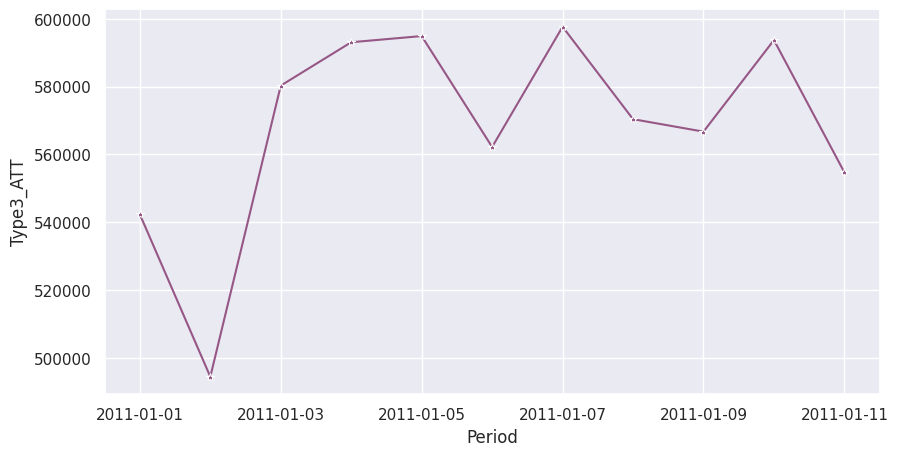

In [26]:
sns.set(rc={'figure.figsize':(10,5)})
ax = sns.lineplot(x='Period',y='Type3_ATT',data = AE_data_plot_2011, marker = '*', color = '#965786')

- This is the best way of importing .csv data into Python ensuring Date columns are imported as Datetime64 columns.